# Tensors - Session

TensorFlow - Tensors #2 by Roshan [youtube](https://www.youtube.com/watch?v=UHrRiHl0Kqg&t=1844s) [github](https://github.com/TwistedHardware/mltutorial/blob/master/notebooks/tf/2.%20Tensors.ipynb)

# `tf.__version__`

텐서플로어와 넘파이를 임포트하자.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Users/sungchul/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/sungchul/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


랜덤넘버들을 이용할텐데 시드를 고정하자.

In [2]:
np.random.seed(0)

텐서플로어는 업데이트가 빨리되서 버젼을 확인하는 것이 좋다.

In [3]:
if 1:
    print(tf.__version__)
elif 1:
    print(tf.VERSION)    

1.8.0


# Generating New Tensors

```
tf.zeros(
    shape,
    dtype=tf.float32,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/zeros

```
tf.ones(
    shape,
    dtype=tf.float32,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/ones

In [4]:
a = tf.zeros(())

In [5]:
a

<tf.Tensor 'zeros:0' shape=() dtype=float32>

In [6]:
if 1:
    print(a.shape)
elif 1:
    print(a.dtype)
elif 1:
    print(a.name)    

()


In [7]:
a.shape.ndims

0

In [8]:
with tf.Session() as sess:
    a_run = sess.run(a)
    print(a_run)

0.0


In [9]:
if 1:
    b = tf.zeros((3,), name="b")
elif 1:
    b = tf.zeros((3), name="b")

In [10]:
b

<tf.Tensor 'b:0' shape=(3,) dtype=float32>

이름을 지정하지 않았으면 이름이 name=None을 이용 만든 함수이름을 따서 zeros가 되었을텐데,
name="b"을 이용 이름을 지정하였음으로 b가 되었네요.

In [11]:
b.name

'b:0'

In [12]:
with tf.Session() as sess:
    b_run = sess.run(b)
    print(b_run)
    print(type(b_run))

[0. 0. 0.]
<class 'numpy.ndarray'>


```
tf.zeros_like(
    tensor,
    dtype=None,
    name=None,
    optimize=True
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/zeros_like

```
tf.ones_like(
    tensor,
    dtype=None,
    name=None,
    optimize=True
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/ones_like

In [13]:
A = tf.constant([[1, 2, 3], 
                 [4, 5, 6]])
a = tf.zeros_like(A)

In [14]:
with tf.Session() as sess:
    print(sess.run(a))

[[0 0 0]
 [0 0 0]]


```
tf.fill(
    shape,
    value,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/fill

In [15]:
c = tf.fill((2,2), 5)

In [16]:
c

<tf.Tensor 'Fill:0' shape=(2, 2) dtype=int32>

In [17]:
c.name

'Fill:0'

In [18]:
c.shape

TensorShape([Dimension(2), Dimension(2)])

In [19]:
c.shape.ndims

2

In [20]:
c.dtype

tf.int32

In [21]:
with tf.Session() as sess:
    c_run = sess.run(c)
    print(c_run)
    print(type(c_run))

[[5 5]
 [5 5]]
<class 'numpy.ndarray'>


# Generating Tensors with Random Values

```
tf.random_normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.float32,
    seed=None,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/random_normal

```
tf.truncated_normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.float32,
    seed=None,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/truncated_normal

```
tf.random_uniform(
    shape,
    minval=0,
    maxval=None,
    dtype=tf.float32,
    seed=None,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/random_uniform

In [22]:
x = tf.random_normal((1000,))

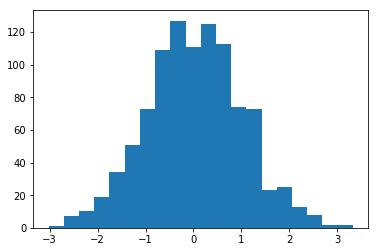

In [23]:
with tf.Session() as sess:
    x_run = sess.run(x)
    plt.hist(x_run, bins=20)

In [24]:
x = tf.random_normal((1000,))
x2 = tf.random_normal((1000,), mean=2.0)

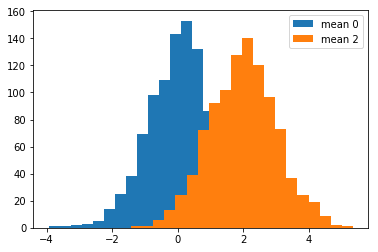

In [25]:
with tf.Session() as sess:
    x_run, x2_run = sess.run([x,x2])
    plt.hist(x_run, bins=20, label="mean 0")
    plt.hist(x2_run, bins=20, label="mean 2")
    plt.legend()

In [26]:
x = tf.random_normal((1000,))
x2 = tf.random_normal((1000,), stddev=2.0)

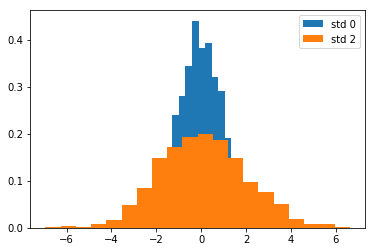

In [27]:
with tf.Session() as sess:
    x_run, x2_run = sess.run([x,x2])
    plt.hist(x_run, bins=20, label="std 0", normed=True)
    plt.hist(x2_run, bins=20, label="std 2", normed=True)
    plt.legend()

In [28]:
x = tf.truncated_normal((1000,))

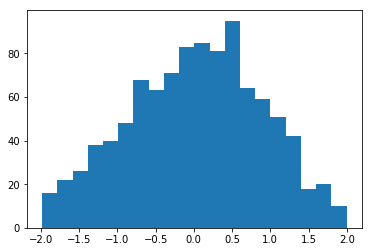

In [29]:
with tf.Session() as sess:
    x_run = sess.run(x)
    plt.hist(x_run, bins=20)

In [30]:
x = tf.random_uniform((1000,))

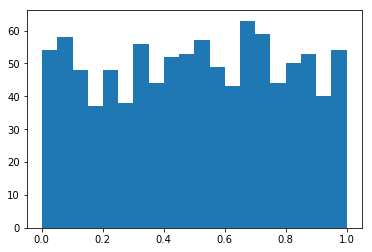

In [31]:
with tf.Session() as sess:
    x_run = sess.run(x)
    plt.hist(x_run, bins=20)

```
tf.random_shuffle(
    value,
    seed=None,
    name=None
)
```

https://www.tensorflow.org/api_docs/python/tf/random_shuffle

In [32]:
a = tf.random_shuffle([1, 2, 3, 4, 5, 6])

In [33]:
with tf.Session() as sess:
    print(sess.run(a))

[1 2 5 3 6 4]


In [34]:
a = tf.random_shuffle([1, 2, 3, 4, 5, 6])[0]

In [35]:
with tf.Session() as sess:
    print(sess.run(a))

1


```
tf.multinomial(
    logits,
    num_samples,
    seed=None,
    name=None,
    output_dtype=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/multinomial

In [36]:
a = tf.multinomial(
    logits=[[1.,2.,2.,0.5]],
    num_samples=10,
    seed=1,
    name='Mutinomial_Samples',
    output_dtype=tf.int32
)

In [37]:
with tf.Session() as sess:
    print(sess.run(a))

[[2 1 2 2 1 1 1 1 2 1]]


# Generating Tensors with Sequence Values

```
tf.range(limit, delta=1, dtype=None, name='range')
tf.range(start, limit, delta=1, dtype=None, name='range')
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/range

In [38]:
if 1:
    x = tf.range(5)
elif 1:
    x = tf.range(0, 5)

In [39]:
with tf.Session() as sess:
    x_run = sess.run(x)
    print(x)
    print(x_run)

Tensor("range:0", shape=(5,), dtype=int32)
[0 1 2 3 4]


In [40]:
x = tf.range(0, 5, 2)

In [41]:
with tf.Session() as sess:
    x_run = sess.run(x)
    print(x)
    print(x_run)

Tensor("range_1:0", shape=(3,), dtype=int32)
[0 2 4]


```
tf.linspace(
    start [float],
    stop_included [float],
    number_points_generated [int],
    name=None
)
```

https://www.tensorflow.org/api_docs/python/tf/lin_space

In [42]:
if 0:
    # TypeError: 
    # Value passed to parameter 'start' has DataType int32 
    # not in list of allowed values: bfloat16, float32, float64
    a = tf.linspace(1, 10, 10) 
elif 1:
    a = tf.linspace(1., 10., 10)

In [43]:
with tf.Session() as sess:
    print(sess.run(a))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


# Reshaping Tensors

```
tf.reshape(
    tensor,
    shape,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/reshape

In [44]:
a = tf.range(6)
b = tf.reshape(a, (3,2))

In [45]:
print(b.name)
print(b.shape)

Reshape:0
(3, 2)


# tf.constant

```
tf.constant(
    value,
    dtype=None,
    shape=None,
    name='Const',
    verify_shape=False
)
```

https://www.tensorflow.org/api_docs/python/tf/constant

In [46]:
a = tf.constant(1)
print(a)

Tensor("Const_1:0", shape=(), dtype=int32)


a는 텐서인데 이름이 Const:0예요.
tf.constant를 이용해서 만들었다고 Const라고 텐서플로어가 `name='Const'`을 이용 이름을 자동으로 만들어 준 거에요.
0은 0번째 레이어를 의미합니다.

In [47]:
b = tf.constant(2)
print(b) 

Tensor("Const_2:0", shape=(), dtype=int32)


b도 텐서인데 이름이 Const_1:0이네요.
tf.constant를 이용해서 만들었다고 Const라고 한거고,
0은 0번째 레이어를 의미합니다.
_1은 두번째로 만들었다는 것이겠죠.
같은 형식으로 하나 더 만들어 볼까요. 

In [48]:
c = tf.constant(3)
print(c) 

Tensor("Const_3:0", shape=(), dtype=int32)


이름이 예상되로 Const_2:0가 나오네요. 
이름을 작의로 주어서 하나 더 만들어 봅시다.

In [49]:
d = tf.constant(4, name='constant')
print(d) 

Tensor("constant:0", shape=(), dtype=int32)


이름이 저가 작명한 constant가 되었고, 아직도 이 텐서는 레이어 0에 배치되어 있네요. 

In [50]:
a = tf.constant(0.1)
b = tf.constant(0.1, shape=(   ))
c = tf.constant(0.1, shape=(2, ))
d = tf.constant(0.1, shape=(2,2))

추가로 shape을 지정할 수 있어요. 

In [51]:
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(b))
    print(sess.run(c))
    print(sess.run(d))

0.1
0.1
[0.1 0.1]
[[0.1 0.1]
 [0.1 0.1]]


# tf.add

```
tf.add(
    x,
    y,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/add

In [52]:
if 1:
    e = a + b 
elif 1:
    e = tf.add(a, b)
print(e)

Tensor("add:0", shape=(), dtype=float32)


e는 텐서인데 이름이 add:0네요.
tf.add를 이용해서 만들었다고 add라고 텐서플로어가 `name=None`을 이용 이름을 자동으로 만들어 준 거에요.
0은 0번째 레이어를 의미합니다.

In [53]:
with tf.Session() as sess:
    print(a) 
    print(b) 
    print(e)

Tensor("Const_4:0", shape=(), dtype=float32)
Tensor("Const_5:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)


In [54]:
with tf.Session() as sess:
    a_run, b_run, e_run = sess.run([a, b, e]) 
    print(a_run, b_run, e_run)

0.1 0.1 0.2


# 두 숫자 더하기

위의 과정을 종합하면, 1+2를 계산하는 텐서플로어 코드는 다음과 같다.

In [55]:
import tensorflow as tf

a = tf.constant(1)
b = tf.constant(2)
c = a + b 

with tf.Session() as sess:
    c_run = sess.run(c) 
    print(c_run)

3


# tf.placeholder

```
tf.placeholder(
    dtype,
    shape=None,
    name=None
)
```

https://www.tensorflow.org/api_docs/python/tf/placeholder

함수와 같이 1과 2이라는 데이타를 나중에 제공하여 계산할 수 도 있다.
이 때 사용하는 것이 tf.placeholder이다. 
```
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
```
이렀게 나중에 데이타를 집어넣을 자리를 만든다.

세션을 돌릴때, a에는 1, b에는 2를 딕션너리 형식으로 feed_dick에 다음과 같이 어싸인한다. 
```
feed_dict={a:1, b:2}
```

In [56]:
import tensorflow as tf

a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
    
c = a + b 

with tf.Session() as sess:
    c_run = sess.run(c, feed_dict={a:2, b:3}) 
    print(c_run)

5


# Hello, TensorFlow! 프린트 하기

In [57]:
import tensorflow as tf

a = tf.constant('Hello, TensorFlow!')

with tf.Session() as sess:
    print(sess.run(a))

b'Hello, TensorFlow!'


sess.run(a)는 bytestring을 리턴한다.
```
b'Hello, TensorFlow!'
```
여기서 b는 bytestring을 의미한다.
bytestring이어야 다른 작업들을 효율적으로 처리할 수 있겠죠.

##### string vs bytestring

Assuming Python 3 (in Python 2, this difference is a little less well-defined) - a string is a sequence of characters, ie unicode codepoints; these are an abstract concept, and can't be directly stored on disk. A byte string is a sequence of, unsurprisingly, bytes - things that can be stored on disk. The mapping between them is an encoding - there are quite a lot of these (and infinitely many are possible) - and you need to know which applies in the particular case in order to do the conversion, since a different encoding may map the same bytes to a different string

https://stackoverflow.com/questions/6224052/what-is-the-difference-between-a-string-and-a-byte-string

> encode(): string ---> bytestring

> decode(): bytestring ---> string

bytestring을 bytestring으로 바꾸려면 decode method를 쓰면 된다.

In [58]:
import tensorflow as tf

a = tf.constant('Hello, TensorFlow!')

with tf.Session() as sess:
    print(sess.run(a).decode())

Hello, TensorFlow!


# tf.rank

```
tf.rank(
    input,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/rank

텐서플로어에서 이야기하는 rank는 선형대수에서 이야기하는 랭크와는 전혀 다른 개념이다.
숫자는 rank 0, 벡터는 rank 1, 흙백사진은 rank 2, 칼라사진은 rank 3, 칼라사진을 여러장 모아놓은 데이타셋은 rank 4이다.

In [59]:
if 0:
    # rank 0
    a = tf.constant(3.14)
elif 0:
    # rank 1
    a = tf.constant(np.random.randn(6))
elif 0:
    # rank 2
    a = tf.constant(np.random.randn(2,3))
elif 0:
    # rank 3
    a = tf.constant(np.random.randn(1,2,3))
elif 1:
    # rank 4
    a = tf.constant(np.random.randn(1,1,2,3))

In [60]:
a_rank = tf.rank(a)

with tf.Session() as sess:
    a_run, a_rank_run = sess.run([a, a_rank])
    print(a_run)
    print(a_rank_run)

[[[[ 1.76405235  0.40015721  0.97873798]
   [ 2.2408932   1.86755799 -0.97727788]]]]
4


```
[[[[ 1.76405235  0.40015721  0.97873798]
   [ 2.2408932   1.86755799 -0.97727788]]]]
```
이 아웃풋의 왼쪽 꺽쇠의 개수가 4이고, 마찬가지로 오른 꺽쇠의 개수가 4이다.
따라서 이것은 rank 4이다.

# tf.shape

```
tf.shape(
    input,
    name=None,
    out_type=tf.int32
)
```

https://www.tensorflow.org/api_docs/python/tf/shape

In [61]:
print(a.shape)

a_shape = tf.shape(a)

with tf.Session() as sess:
    a_run, a_shape_run = sess.run([a, a_shape])
    print(a_run)
    print(a_shape_run)

(1, 1, 2, 3)
[[[[ 1.76405235  0.40015721  0.97873798]
   [ 2.2408932   1.86755799 -0.97727788]]]]
[1 1 2 3]


# tf.matmul vs tf.multiply

```
tf.matmul(
    a,
    b,
    transpose_a=False,
    transpose_b=False,
    adjoint_a=False,
    adjoint_b=False,
    a_is_sparse=False,
    b_is_sparse=False,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/matmul

```
tf.multiply(
    x,
    y,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/multiply

<div align="center"><img src="img/Matrix_multiplication_diagram.svg" width="20%" height="10%"></div>

https://upload.wikimedia.org/wikipedia/commons/1/11/Matrix_multiplication_diagram.svg

<div align="center"><img src="img/Screen Shot 2018-02-27 at 오후 10.38.55.png" width="50%"></div>

https://stackoverflow.com/questions/47583501/tf-multiply-vs-tf-matmul-to-calculate-the-dot-product

랭크가 일치하면 행렬곱을 수행할 수 있다.
만약 랭크가 일치하지 않으면, 행렬곱을 수행할 때 에러가 발생한다.

In [62]:
if 0:
    # shape: (3,3)*(3,3)=(3,3)
    a = tf.constant([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]], dtype=tf.float32) # rank 2
    b = tf.constant([[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]], dtype=tf.float32) # rank 2                                                           # rank 2
elif 0:
    # shape: (3,3)*(3,1)=(3,1)
    a = tf.constant([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]], dtype=tf.float32) # rank 2
    b = tf.constant([[1.], [1.], [1.]], dtype=tf.float32)                         # rank 2
elif 0:
    # shape: (1,3)*(3,3)=(1,3)
    a = tf.constant([[2., 2., 2.]], dtype=tf.float32)                             # rank 2
    b = tf.constant([[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]], dtype=tf.float32) # rank 2
elif 1:                             
    # shape: (1,3)*(3,1)=(1,1)                                                  
    a = tf.constant([[2., 2., 2.]], dtype=tf.float32)                             # rank 2
    b = tf.constant([[1.], [1.], [1.]], dtype=tf.float32)                         # rank 2
elif 1:
    # 랭크가 일치하지 않아서, 행렬곱을 수행할 때 에러가 발생한다.
    a = tf.constant([2., 2., 2.], dtype=tf.float32)                               # rank 1
    b = tf.constant([[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]], dtype=tf.float32) # rank 2
elif 1:
    # 랭크가 일치하지 않아서, 행렬곱을 수행할 때 에러가 발생한다.
    a = tf.constant([[1.], [2.], [3.]], dtype=tf.float32)                         # rank 2
    b = tf.constant([1.], dtype=tf.float32)                                       # rank 1

In [63]:
c = tf.matmul(a, b)                                                          

In [64]:
with tf.Session() as sess:
    a_run, b_run, c_run = sess.run([a, b, c])
    print(a_run)
    print(b_run)
    print(c_run)

[[2. 2. 2.]]
[[1.]
 [1.]
 [1.]]
[[6.]]


In [65]:
if 1: 
    a = tf.constant([[2]])
elif 1: 
    a = tf.constant([2])
elif 1: 
    a = tf.constant(2)    
b = tf.constant([[1, 0],
                 [0, 1],
                 [1, 1]])

In [66]:
c = tf.multiply(a, b)

In [67]:
with tf.Session() as sess:
    a_run, b_run, c_run = sess.run([a, b, c])
    print(a_run)
    print(b_run)
    print(c_run)

[[2]]
[[1 0]
 [0 1]
 [1 1]]
[[2 0]
 [0 2]
 [2 2]]


```
tf.transpose(
    a,
    perm=None,
    name='transpose',
    conjugate=False
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/transpose

In [68]:
A = tf.constant([[2., 1.]])
X = tf.constant([[2., 2.], [-3., 3.]])

In [69]:
A_transpose = tf.transpose(A)
X_transpose = tf.transpose(X)

In [70]:
with tf.Session() as sess:
    print(sess.run(A_transpose))
    print(sess.run(X_transpose))

[[2.]
 [1.]]
[[ 2. -3.]
 [ 2.  3.]]


# tf.add

```
tf.add(
    x,
    y,
    name=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/add

더하기는 브로드케스팅이 예상대로 되네요.

In [71]:
if 0:
    a = tf.constant([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]], dtype=tf.float32) # rank 2
    b = tf.constant([[1., 2., 3.], [1., 2., 3.], [1., 2., 3.]], dtype=tf.float32) # rank 2
elif 1:
    a = tf.constant([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]], dtype=tf.float32) # rank 2
    b = tf.constant([1., 2., 3.], dtype=tf.float32)                               # rank 1
elif 1:
    a = tf.constant([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]], dtype=tf.float32) # rank 2
    b = tf.constant(1., dtype=tf.float32)                                         # rank 0                                                           

In [72]:
c = a + b                                                          

In [73]:
with tf.Session() as sess:
    a_run, b_run, c_run = sess.run([a, b, c])
    print(a_run)
    print(b_run)
    print(c_run)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]
[1. 2. 3.]
[[2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]


# Three data types - tf.constant, tf.get_variable, tf.placeholder

```
tf.get_variable(
    name,
    shape=None,
    dtype=None,
    initializer=None,
    regularizer=None,
    trainable=True,
    collections=None,
    caching_device=None,
    partitioner=None,
    validate_shape=True,
    use_resource=None,
    custom_getter=None,
    constraint=None
)
```

https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/get_variable

In [74]:
a = tf.constant([1, 2, 3], dtype=tf.float32)
b = tf.Variable([1, 2, 3], dtype=tf.float32, name='variable_b')
c = tf.placeholder(tf.float32)
d = tf.multiply(a,b) + c

In [75]:
print(a)
print(b)
print(c)

Tensor("Const_21:0", shape=(3,), dtype=float32)
<tf.Variable 'variable_b:0' shape=(3,) dtype=float32_ref>
Tensor("Placeholder_2:0", dtype=float32)


In [76]:
with tf.Session() as sess:

    a_run = sess.run(a)
    print(a_run)

    # to run an expression containing tf.Variable, we need to either initialize or restore
    tf.global_variables_initializer().run()
    b_run = sess.run(b)
    print(b_run)

    # to run an expression containing tf.placeholder, we need to feed a specific value
    c_run, d_run = sess.run([c, d], feed_dict={c: [1, 2, 3]})
    print(c_run)
    print(d_run)

[1. 2. 3.]
[1. 2. 3.]
[1. 2. 3.]
[ 2.  6. 12.]


# How to define and use functions using tensorflow

In [77]:
def table99(integer_given):
    left  = tf.placeholder(tf.int32)
    right = tf.placeholder(tf.int32)
    m     = left * right

    with tf.Session() as sess:
        for i in range(1, 10):
            m_run = sess.run(m, feed_dict={left: integer_given, right: i})
            print('%d x %d = %2d' %(integer_given, i, m_run))

In [78]:
table99(7)

7 x 1 =  7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63
